<a href="https://colab.research.google.com/github/ashjig/My-files2/blob/main/Copy_of_reliance8year1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
df=pd.read_csv('relianceold_final.csv')
#two days offset data without rsi

In [6]:
df.head()

,Price,Volume,Year,Day,Month,RSI,PVI,Ema,MFI
0,853.60,6960000,2018,12,1,68.148462,103.107218,832.069778,75.532982
1,830.04,5130000,2018,15,1,63.911097,103.122924,832.095778,75.499078
2,831.43,5000000,2018,16,1,49.553682,100.276654,827.383778,74.838721
3,827.12,6090000,2018,17,1,50.165340,100.444579,827.661778,74.445267
4,837.55,4330000,2018,18,1,49.272224,99.923890,826.799778,75.295555


In [7]:
df.isnull().sum()

Price     0
Volume    0
Year      0
Day       0
Month     0
RSI       0
PVI       0
Ema       0
MFI       0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,1491.0,1.734810e+03,5.623071e+02,793.840000,1.153330e+03,1.865970e+03,2.249360e+03,2.788250e+03
Volume,1491.0,9.343861e+06,7.009731e+06,709560.000000,5.235000e+06,7.270000e+06,1.079500e+07,6.585000e+07
Year,1491.0,2.020552e+03,1.724813e+00,2018.000000,2.019000e+03,2.021000e+03,2.022000e+03,2.024000e+03
Day,1491.0,1.576995e+01,8.762339e+00,1.000000,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
Month,1491.0,6.496311e+00,3.467077e+00,1.000000,3.000000e+00,7.000000e+00,9.000000e+00,1.200000e+01
RSI,1491.0,5.339201e+01,1.700583e+01,10.046113,4.054161e+01,5.308081e+01,6.692783e+01,9.707609e+01
PVI,1491.0,2.094303e+02,6.791814e+01,95.903352,1.392951e+02,2.253881e+02,2.717107e+02,3.368469e+02
Ema,1491.0,1.008088e+03,1.124385e+02,820.143778,8.919788e+02,1.034506e+03,1.111193e+03,1.219026e+03
MFI,1491.0,5.345625e+01,1.517341e+01,10.473134,4.261867e+01,5.342720e+01,6.446981e+01,8.937964e+01


In [9]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

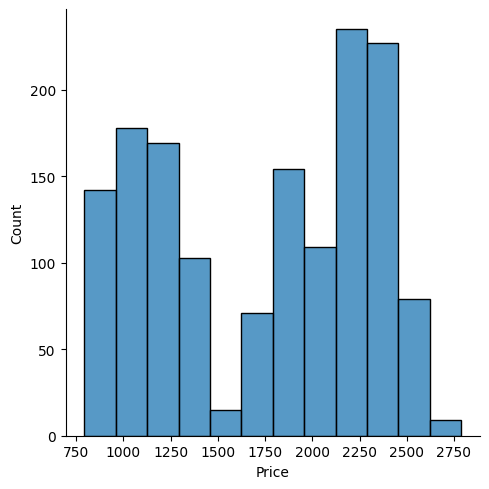

In [10]:
sns.displot(df['Price'])

In [11]:
df.corr()['Price'].sort_values()

Volume   -0.190151
Day      -0.013610
MFI       0.051244
RSI       0.051541
Month     0.179411
Year      0.923917
Ema       0.998597
PVI       0.998597
Price     1.000000
Name: Price, dtype: float64

In [12]:
X=df.drop(['Price','PVI'],axis=1).values

In [13]:
Y=df['Price'].values

In [14]:
X[1]

array([5.13000000e+06, 2.01800000e+03, 1.50000000e+01, 1.00000000e+00,
       6.39110969e+01, 8.32095778e+02, 7.54990777e+01])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.3, random_state=101)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler= MinMaxScaler()

In [19]:
x_train[1]

array([5.24000000e+06, 2.02300000e+03, 2.80000000e+01, 6.00000000e+00,
       5.58769951e+01, 1.12066178e+03, 7.21528448e+01])

In [20]:
x_train = scaler.fit_transform(x_train)

In [21]:
x_train[1]

array([0.06954881, 0.83333333, 0.9       , 0.45454545, 0.52122809,
       0.75324982, 0.78168089])

In [22]:
x_test=scaler.transform(x_test)

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense

In [25]:
x_train.shape

(1043, 7)

In [27]:
model=Sequential()
model.add(Dense(7,activation='elu'))
model.add(Dense(7,activation='elu'))
model.add(Dense(7,activation='elu'))
model.add(Dense(7,activation='elu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [39]:
y_train==x_train**4+x_train**3-x_train

<ipython-input-39-980d13623c83>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  y_train==x_train**4+x_train**3-x_train


False

In [40]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=50,epochs=500)

Epoch 1/500
21/21 [==============================] - 0s 4ms/step - loss: 850.7451 - val_loss: 982.4506
Epoch 2/500
21/21 [==============================] - 0s 3ms/step - loss: 853.6260 - val_loss: 979.6086
Epoch 3/500
21/21 [==============================] - 0s 2ms/step - loss: 838.7521 - val_loss: 979.4627
Epoch 4/500
21/21 [==============================] - 0s 2ms/step - loss: 847.7686 - val_loss: 979.8309
Epoch 5/500
21/21 [==============================] - 0s 3ms/step - loss: 839.0590 - val_loss: 982.7256
Epoch 6/500
21/21 [==============================] - 0s 2ms/step - loss: 845.4353 - val_loss: 990.3160
Epoch 7/500
21/21 [==============================] - 0s 3ms/step - loss: 847.2366 - val_loss: 1010.4781
Epoch 8/500
21/21 [==============================] - 0s 2ms/step - loss: 887.8655 - val_loss: 981.9971
Epoch 9/500
21/21 [==============================] - 0s 3ms/step - loss: 858.8403 - val_loss: 992.9510
Epoch 10/500
21/21 [==============================] - 0s 3ms/step - loss

In [41]:
losses= pd.DataFrame(model.history.history)

<Axes: >

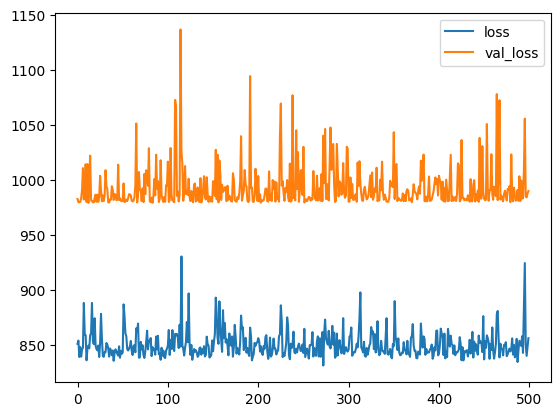

In [43]:
losses.plot()

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [32]:
predictions=model.predict(x_test)

14/14 [==============================] - 0s 960us/step


In [33]:
np.sqrt(mean_squared_error(y_test,predictions))

31.4065120245142

In [34]:
mean_absolute_error(y_test,predictions)

22.469392193385538

In [35]:
df['Price'].describe()

count    1491.000000
mean     1734.810080
std       562.307055
min       793.840000
25%      1153.330000
50%      1865.970000
75%      2249.360000
max      2788.250000
Name: Price, dtype: float64

In [36]:
explained_variance_score(y_test,predictions)

0.9969917312462004

In [37]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

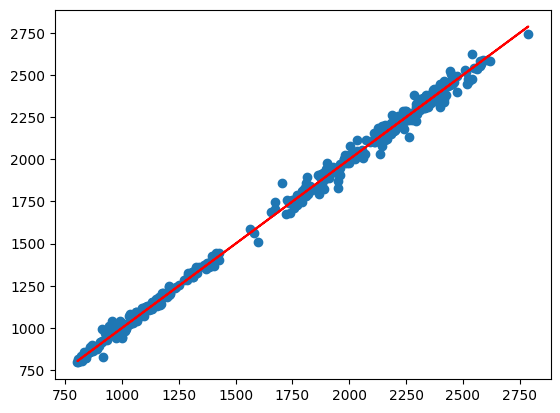

In [38]:
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
#checking 800th  price

In [ ]:
paisa=df.drop(['Price'],axis=1).iloc[1057]

In [ ]:
paisa.values

array([7.87000000e+06, 2.02200000e+03, 2.50000000e+01, 4.00000000e+00,
       5.36340955e+01, 2.95581999e+02, 1.15071178e+03, 4.57334978e+01])

In [ ]:
paisa=paisa.values.reshape(-1,8)
#-1 means keep all the dimension along the axis

In [ ]:

paisa=scaler.transform(paisa)

In [ ]:
model.predict(paisa)

1/1 [==============================] - 0s 24ms/step


array([[2445.864]], dtype=float32)

In [ ]:
df[1053:]

,Price,Volume,Year,Day,Month,RSI,PVI,Ema,MFI
1053,2467.97,12060000,2022,19,4,52.240878,289.636968,1140.869778,46.038230
1054,2525.75,11570000,2022,20,4,59.636500,298.154032,1154.969778,50.776830
1055,2504.60,10020000,2022,21,4,60.683558,305.134401,1166.525778,52.452567
1056,2446.68,6950000,2022,22,4,62.507219,302.579281,1162.295778,51.793529
1057,2519.90,7870000,2022,25,4,53.634095,295.581999,1150.711778,45.733498
...,...,...,...,...,...,...,...,...,...
1486,2749.25,4310000,2024,15,1,78.985108,336.846874,1219.025778,77.168851
1487,2723.15,4530000,2024,16,1,70.672098,332.135307,1211.225778,70.601323
1488,2735.90,6100000,2024,17,1,64.692654,328.982181,1206.005778,61.880370
1489,2734.90,5140000,2024,18,1,69.236651,330.522501,1208.555778,69.318837
